### diffusion path

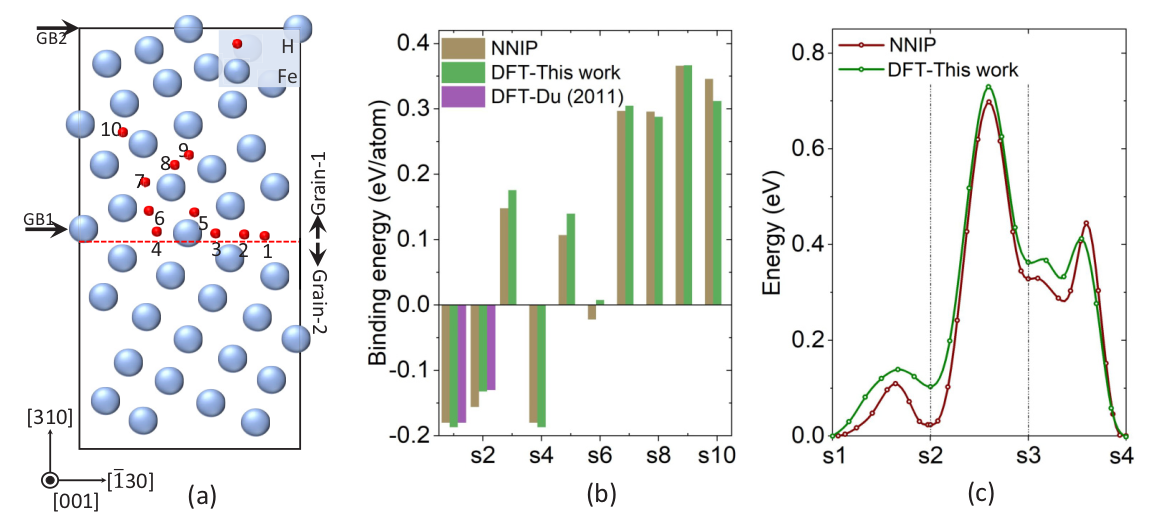

In [53]:
from pyiron import Project
import numpy as np
import matplotlib.pylab as plt
import ase.units

In [3]:
potential =  'FeH-NNIP'

In [4]:
pr = Project("H-GBs")

In [5]:
bulk = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic=True)
job_min = pr.create.job.Lammps('minimise', delete_existing_job=True)
job_min.structure = bulk
job_min.potential = potential
job_min.calc_minimize(pressure=0.0)
job_min.run(delete_existing_job=True)
eFe = job_min.output.energy_tot[-1]/len(bulk)
structure = job_min.get_structure(-1)

The job minimise was saved and received the ID: 10589


In [47]:
gb = pr.create.structure.aimsgb.build((0,0,1), 5, (3,-1,0), structure,
                                      uc_a=1, uc_b=1, add_if_dist=1)
gb = gb.repeat([1,1,2])
# gb.center()
gb.plot3d()

NGLWidget()

In [48]:
len(gb)

80

In [49]:
gb.get_positions()[20]

array([9.94901873, 0.        , 0.        ])

In [50]:
H = pr.create.structure.atoms('H', positions=[(9.94901873, 1.5        , 0.        )], cell=gb.get_cell())
gb+=H
gb.plot3d()

NGLWidget()

In [54]:
gb.get_positions()[14]

array([6.26431311, 3.57960749, 1.4149641 ])

In [55]:
H = pr.create.structure.atoms('H', positions=[(5.26431311, 3.57960749, 1.4149641 )], cell=gb.get_cell())
gb+=H
gb.plot3d()

NGLWidget()